# EDA + SNA Implementation

In [508]:
import math
import pandas as pd
import numpy as np
import networkx as nx
import time as time
import pickle
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 5000 # Set Duration To 1000 ms == 1 second
#For Loading intermediate libraries
def save_obj(obj, name ):
    with open(r"D:\working repos\SNA\Pickle_Loads\ "+ str(name) + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(r"D:\working repos\SNA\Pickle_Loads\ "+ str(name) + '.pkl', 'rb') as f:
        return pickle.load(f)
import warnings
warnings.filterwarnings('ignore')

In [260]:
try:
    new = pd.read_csv(r'C:\Users\Akhil Sanker\Downloads\Compressed\BindingDB_All.tsv',sep='\t',chunksize=50,usecols=['PubChem CID','Target Name Assigned by Curator or DataSource','Ki (nM)','IC50 (nM)','Kd (nM)'])
except Exception as e:
    print(e)

In [ ]:
var=1
for i in range(10):
    if i==0:
        var=1
    else:
        pass
    try:

        for df in new:
            df.to_csv('file.csv', sep=',', mode='a')
    except:
        print("Error : "+str(var))
        var+=1
        pass

In [ ]:
for i in range(10):
    try:
        file1 =  pd.read_csv("file.csv")
    except Exception as e:
        print(e)

**PART WORKING FILE** - EDA

In [513]:
import math
import pandas as pd
import numpy as np
import networkx as nx
import time as time

In [514]:
file1 = pd.read_csv('temp_work_file_new.csv')

In [515]:
temp_work_file_new = file1[['PubChem CID','Target Name Assigned by Curator or DataSource','Ki (nM)','IC50 (nM)','Kd (nM)']]

In [516]:
'''temp_work_file_new.to_csv("temp_work_file_new.csv")'''

'temp_work_file_new.to_csv("temp_work_file_new.csv")'

In [517]:
tmp_wrk = temp_work_file_new.loc[temp_work_file_new['PubChem CID']!='PubChem CID']

In [518]:
tmp_wrk.drop_duplicates(inplace=True)
tmp_wrk.drop_duplicates(subset='PubChem CID',inplace=True)
tmp_wrk.dropna(subset=['PubChem CID'],inplace=True)

In [519]:
tdf_a = tmp_wrk[['PubChem CID','Target Name Assigned by Curator or DataSource']]
tdf_b = tmp_wrk[['Ki (nM)','IC50 (nM)','Kd (nM)']]
tdf_b.fillna('99999',inplace=True)

In [520]:
tb_list_1 = tdf_b['Ki (nM)']
tb_list_2 = tdf_b['IC50 (nM)']
tb_list_3 = tdf_b['Kd (nM)']
ki_list = []
ic_list = []
kd_list = []
for x in tb_list_1:
    if '<' in x or '>' in x or '#' in x:
        x=str(float(x[1:])+0.5)
        
    ki_list.append(x)
for y in tb_list_2:
    if '<' in y or '>' in y or '#' in y:
        y=str(float(y[1:])+0.5)
        
    ic_list.append(y)
for z in tb_list_3:
    if '<' in z or '>' in z or '#' in z:
        z=str(float(z[1:])+0.5)
        
    kd_list.append(z)

#Number issue sortedd..Converted all to numbers.

In [521]:
tb_final = pd.DataFrame()
tb_final['Ki (nM)'] = ki_list
tb_final['IC50 (nM)'] = ic_list
tb_final['Kd (nM)'] = kd_list
tdf_a.reset_index(inplace=True)
tdf_new = pd.concat([tdf_a ,tb_final],axis=1)
try:
    tdf_new.drop('index',axis=1 ,inplace=True)
except:
    pass
out_df = tdf_new.loc[(tdf_new['Ki (nM)']=='99999') &(tdf_new['Kd (nM)']=='99999') & (tdf_new['IC50 (nM)']=='99999')]
part_cleaned = pd.concat([tdf_new,out_df,out_df]).drop_duplicates(keep=False)
part_cleaned['min'] = part_cleaned[['Ki (nM)','IC50 (nM)','Kd (nM)']].min(axis=1)
part_cleaned #Cleaned number issue,.. removed 3==nan , added minimum.

,PubChem CID,Target Name Assigned by Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),min
0,3081361,HIV-1 Protease,0.24,99999,99999,0.24
1,5327236,HIV-1 Protease,0.25,99999,99999,0.25
2,5327235,HIV-1 Protease,0.41,99999,99999,0.41
3,5327234,HIV-1 Protease,0.8,99999,99999,0.80
4,3009319,HIV-1 Protease,0.99,99999,99999,0.99
...,...,...,...,...,...,...
790549,76318239,Acetylcholinesterase,99999,39110,99999,39110.00
790550,76336413,Acetylcholinesterase,99999,50000.5,99999,50000.50
790551,76321936,Acetylcholinesterase,99999,180,99999,180.00
790552,76329133,Acetylcholinesterase,99999,50830,99999,50830.00


In [522]:
'''Note : - The mixture(Hiv-acronym is an example) is not cleaned, Still Proceeding with the available data '''

'Note : - The mixture(Hiv-acronym is an example) is not cleaned, Still Proceeding with the available data '

In [523]:
cid_target_dict  = part_cleaned.groupby('PubChem CID')['Target Name Assigned by Curator or DataSource'].apply(list).to_dict()

In [524]:
len(cid_target_dict.keys())
#Dictionary of unique key-value pairs of compounds and their targets


710157

In [525]:
'''
CHECKING FOR NAN

import math
math.isnan(tmp_wrk['Kd (nM)'][0])'''

"\nCHECKING FOR NAN\n\nimport math\nmath.isnan(tmp_wrk['Kd (nM)'][0])"

In [526]:
part_cleaned

,PubChem CID,Target Name Assigned by Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),min
0,3081361,HIV-1 Protease,0.24,99999,99999,0.24
1,5327236,HIV-1 Protease,0.25,99999,99999,0.25
2,5327235,HIV-1 Protease,0.41,99999,99999,0.41
3,5327234,HIV-1 Protease,0.8,99999,99999,0.80
4,3009319,HIV-1 Protease,0.99,99999,99999,0.99
...,...,...,...,...,...,...
790549,76318239,Acetylcholinesterase,99999,39110,99999,39110.00
790550,76336413,Acetylcholinesterase,99999,50000.5,99999,50000.50
790551,76321936,Acetylcholinesterase,99999,180,99999,180.00
790552,76329133,Acetylcholinesterase,99999,50830,99999,50830.00


**Removing and creating a new dataset of lists values......**

In [527]:
wrk = part_cleaned
wrk.reset_index(inplace=True)
wrk = wrk[['PubChem CID','index','Target Name Assigned by Curator or DataSource','min']]

In [528]:
split_df = wrk[(wrk['Target Name Assigned by Curator or DataSource'].str.contains(',' or'/'))]

**Deleting the above from the main dataframe pd.concat([df1, df2, df2]).drop_duplicates(keep=False)**

In [529]:
wrk_1 = pd.concat([wrk,split_df,split_df]).drop_duplicates(keep=False)

In [530]:
df1 = wrk_1
df2 = split_df
df1.shape,df2.shape

((674690, 4), (35467, 4))

**Graph Building Phase-1** 

In [531]:
target_list = list(df1['Target Name Assigned by Curator or DataSource'].unique())

In [532]:
#PART 1 - Casual Non-Complex List
t1 = time.time()
ele = 1
part_1_dict = {}
for targ in target_list: 
    print(str(ele)+str(" : ") + str(targ))
    tmp = df1.loc[df1['Target Name Assigned by Curator or DataSource']==targ]
    tmp_ids = tmp['PubChem CID'].to_list()
    Central_Node = targ
    tmp_ids.append(Central_Node)
    A = nx.Graph()
    A.add_nodes_from(tmp_ids)
    tmp_ids.pop()
    for pid in tmp_ids:
        val = float(tmp.loc[tmp['PubChem CID']==pid]['min'])
        A.add_edge(Central_Node,pid,weight=val)
    part_1_dict['{}'.format(ele)] = A
    ele+=1
    '''if ele ==50:
        break'''
t2 = time.time()
print(str("Time taken for : ") +str(len(target_list))+" is "+str(t2-t1)+" Seconds")

1 : HIV-1 Protease
2 : HIV-1 protease M1
3 : Cytochrome P450 3A
4 : Galactokinase (GALK)
5 : Caspase-3
6 : Caspase-1
7 : Autotaxin
8 : HIV-1 Reverse Transcriptase
9 : Orexin receptor type 1 (OX1)
10 : Hormone-sensitive lipase (HSL)
11 : Dual specificity mitogen-activated protein kinase kinase 1
12 : 11-beta-hydroxysteroid dehydrogenase 1
13 : Beta-lactamase (KPC-2)
14 : HIV-1 Reverse Transcriptase Mutant (Y181C)
15 : Focal adhesion kinase 1
16 : Tyrosine-protein kinase JAK2
17 : Amine oxidase [flavin-containing] A
18 : Reverse transcriptase protein
19 : Protein Kinase C
20 : HIV-1 Reverse Transcriptase Mutant (P236L)
21 : cAMP-Dependent Protein Kinase (PKA)
22 : Insulin receptor
23 : Epidermal growth factor receptor
24 : Platelet-derived growth factor receptor beta
25 : Protein kinase C alpha type
26 : Epoxide hydrolase 1
27 : Hepatocyte growth factor receptor
28 : Chymase
29 : Glucagon
30 : HCV NS3-NS4A Serine Proteinase
31 : Proto-oncogene tyrosine-protein kinase Src
32 : Cyclin-depe

248 : Histamine receptor (H3)
249 : Histamine H4 receptor
250 : AICAR Tfase
251 : IMP Cyclohydrolase (IMPCH)
252 : GAR Tfase
253 : Gag-Pol polyprotein
254 : Factor XIIa
255 : DNA Ligase (MtuLigA)
256 : Anandamide amidohydrolase
257 : Fatty Acid Amide Hydrolase
258 : D-Amino Acid Oxidase (DAAO)
259 : Homoisocitrate Dehydrogenase (HICDH)
260 : Lactate Dehydrogenase
261 : Botulinum Neurotoxin Type A
262 : Immunophilin FKBP12
263 : Peptidyl-prolyl cis-trans isomerase FKBP1A
264 : HIV-1 Integrase
265 : alpha-Amylase
266 : Ubiquitin C-terminal Hydrolase L3 (UCH-L3)
267 : UDP-3-O-Acyl-GlcNAc Deacetylase (LpxC)
268 : TNF-alpha-Converting Enzyme
269 : ADAM17
270 : Hydroxycarboxylic acid receptor 2
271 : beta-Ketoacyl-ACP Synthase III (FabH)
272 : Equilibrative Nucleoside Transporter 1 (ENT1)
273 : Leukocyte elastase
274 : Kinesin Spindle Protein Eg5
275 : Calpain-1
276 : Aryl Hydrocarbon Receptor (AhR)
277 : Prostanoid IP receptor
278 : Cytosol aminopeptidase
279 : ADAMTS-5 (Aggrecanase-2)
280 

471 : Tumor necrosis factor ligand superfamily member 10
472 : Eph receptor A4
473 : Hematopoietic protein-tyrosine phosphatase (HEPTP)
474 : heat shock 70kDa protein 8 isoform 2
475 : Valosin-containing protein
476 : hexokinase
477 : phosphomannomutase 2
478 : 3C-like protease
479 : Estradiol receptor beta (ER&#946;)
480 : Induced myeloid leukemia cell differentiation protein Mcl-1
481 : BZLF2
482 : DNA repair protein RAD51 homolog 1
483 : Dual specificity protein phosphatase (VHR)
484 : Beta lactamase
485 : Peptidyl-prolyl cis-trans isomerase
486 : Ubiquitin carboxyl-terminal hydrolase isozyme L1 (UCH-L1)
487 : Ubiquitin carboxyl-terminal hydrolase isozyme L3 (UCH-L3)
488 : Zinc aminopeptidase
489 : nucleotide-binding oligomerization domain containing 2
490 : ubiquitin-conjugating enzyme E2I
491 : neuronal munc18-1 binding protein
492 : Tyrosine-protein phosphatase non-receptor type 22
493 : plectin 1
494 : Opioid receptors; mu/kappa/delta
495 : core protein
496 : likely tRNA 2&#39;-

716 : Neuronal acetylcholine receptor subunit alpha-4
717 : Serotonin receptor (2b and 2c)
718 : Nicotinic Alpha-Bungarotoxin
719 : Metabotropic glutamate receptor 1
720 : GABA A Alpha4Beta2Gamma2
721 : Alpha-glucosidase MAL12
722 : NPY5R
723 : Neuropeptide Y receptor type 5 ( NPY Y5)
724 : Metabotropic glutamate receptor 2
725 : Metabotropic glutamate receptor 4 (mGlu4)
726 : 5-hydroxytryptamine receptor 7 (5HT7)
727 : Adenosine receptor A1 (A1)
728 : Gamma-aminobutyric acid receptor (GABA(A)) subunit alpha-4
729 : P2X purinoceptor 4
730 : Endothelin-1 receptor
731 : GALR1
732 : Metabotropic glutamate receptor 4 (mGluR4)
733 : HTR1A
734 : HTR1B
735 : AVPR1A
736 : 5-hydroxytryptamine receptor 1A (5HT1B)
737 : Tyrosinase
738 : Serotonin N-acetyltransferase (AANAT)
739 : Peptidyl-prolyl cis-trans isomerase A
740 : Homoserine kinase
741 : dCTP pyrophosphatase 1 (DCTPP1)
742 : Prostanoid EP2 Receptor
743 : Prostanoid EP3 Receptor
744 : PTGFR
745 : Thromboxane Alpha
746 : GABA A receptor al

969 : Beta amyloid A4 protein
970 : Cathepsin V
971 : SKiNhead family member (skn-1)
972 : endothelial PAS domain-containing protein 1
973 : C-X-C chemokine receptor type 5 isoform 1
974 : sentrin-specific protease 1
975 : Low molecular weight phosphotyrosine protein phosphatase (LMWPTP)
976 : hypothetical protein SA1422
977 : ADP-ribosylation factor GTPase-activating protein 1
978 : HIV-1 B HXB2-LAI-IIIB-BRU
979 : MSRA protein
980 : nuclear receptor subfamily 5 group A member 2 isoform 2
981 : methionyl-tRNA synthetase
982 : TCRAV4S1
983 : cyclic AMP receptor protein
984 : Galanin receptor 3
985 : nuclear receptor subfamily 0 group B member 1
986 : Endothelin-converting enzyme 1 (ECE)
987 : Serine/threonine-protein kinase ATR
988 : Orexin receptor type 2
989 : Orexin receptor type 2 (OX2)
990 : Monocyte chemotactic protein-1 (MCP-1)
991 : Enoyl-ACP reductase (ENR)
992 : Protease
993 : Glycine transporter 1
994 : Solute carrier family 22 member 12
995 : Transient receptor potential M8 

1184 : Calcium/calmodulin-dependent protein kinase type II subunit delta
1185 : Bromodomain-containing protein 4
1186 : Coagulation factor IX
1187 : Nuclear factor NF-kappa-B
1188 : Monoglyceride lipase
1189 : Death-associated protein kinase 1 (DAPK1)
1190 : Juvenile hormone epoxide hydrolase (JHEH)
1191 : Thiamine transporter (ThiT)
1192 : PNAG de-N-acetylase (PgaB)
1193 : Peptidoglycan de-N-acetylase (PgdA)
1194 : Integrase
1195 : Transient receptor potential cation channel subfamily M member 8 (TRPM8)
1196 : Menin
1197 : Thymidine phosphorylase (TP)
1198 : Chitin synthase (CS)
1199 : Beta-glucuronidase (&#946;-glucuronidase)
1200 : DENV2 protease (NS2B-NS3)
1201 : N-terminal nucleophile hydrolase (PVdQ)
1202 : ADC-7 beta-lactamase (ADC-7)
1203 : SHV-1 beta-lactamase
1204 : Mandelate racemase (MR)
1205 : Eis_Ban acetyltransferase (Eis_Ban)
1206 : Nitric oxide synthase (bsNOS)
1207 : Cysteine protease SpeB (SpeB)
1208 : Acetylpolyamine amidohydrolase (APAH)
1209 : Class A beta-lactama

1387 : Androgen-induced gene 1 protein (AIG1)
1388 : Phosphoglycerate dehydrogenase (PHGDH)
1389 : Lysine-specific demethylase 4C (KDM4C)
1390 : Lysine-specific demethylase 5A (KDM5A)
1391 : G-protein coupled receptor 10 (GPR10)
1392 : DNA Synthesis
1393 : Cell surface glycoprotein MUC18
1394 : Sortilin
1395 : Voltage-gated potassium channel subunit Kv1.5
1396 : Membrane-bound aminopeptidase P (APP2)
1397 : Flap endonuclease 1 (hFEN1-336&#916;)
1398 : Liver fatty acid binding protein (FABP1)
1399 : F420-dependent glucose-6-phosphate dehydrogenase (FGD)
1400 : Nitric Oxide Synthase
1401 : HDAC6 (CD1-CD2)
1402 : PED10A
1403 : Tandem CD1-CD2 construct (hCD12)
1404 : Catalytic domain 2 (zCD2)
1405 : Macrophage colony-stimulating factor 1 receptor (CSF1R) or (c-fms)
1406 : 3-Phosphoinositide dependent protein kinase-1
1407 : Matrix metalloproteinase-2 (MMP-2)
1408 : Tyrosyl-tRNA synthetase (TryRS)
1409 : Tyrosine-protein phosphatase non-receptor type 2
1410 : Glycine Transporter 1 (GlyT1)
1

1588 : Tankyrase-1
1589 : Tyrosine-protein phosphatase non-receptor type 9 (PTP-MEG2)
1590 : Retinoic acid-related nuclear receptor gamma t (ROR&#947;t)
1591 : Eye absent protein 2 Eya domain (Eya2 ED)
1592 : Lysine-specific demethylase 6B
1593 : Thiol:disulfide interchange protein (DsbA)
1594 : Abelson tyrosine-kinase 2 SH2 domain (Arg SH2)
1595 : Phenylalanyl-tRNA synthetase (PheRS)
1596 : Heme-binding protein HutZ (HutZ)
1597 : alpha-Glucosidase (&#945;-Glucosidase)
1598 : Troponin C (TnC)
1599 : Dual-specificity phosphatase 5 phophatase (DUSP5)
1600 : Cathepsin L1 (CL1)
1601 : Amyloid Binding Alcohol Dehydrogenase
1602 : HDACs
1603 : 5-alpha-Reductase (5&#945;-Reductase)
1604 : &#946;-Ketoacyl-acyl carrier protein (ACP) synthase III (FabH)
1605 : Protein farnesyltransferase (PFTase)
1606 : Glutathione transferase (GST)
1607 : Isocitrate lyase (ICL)
1608 : Glucose 6-phosphate dehydrogenase (G6PD)
1609 : Fibroblast activation protein (FAP)
1610 : N-acylethanolamine-hydrolyzing acid a

1797 : PTK2B protein tyrosine kinase 2 beta (PTK2B)
1798 : Proteinase-activated receptor 4 (PAR4)
1799 : Cyclophilin A
1800 : Cytochrome P450 2D6
1801 : Lipopolysaccharide-induced tumor necrosis factor-alpha factor
1802 : Sodium channel protein type 10 subunit alpha
1803 : Voltage-dependent calcium channel gamma-8 subunit
1804 : Phosphatidylinositol 4-phosphate 3-kinase C2 domain-containing subunit alpha
1805 : G-protein coupled estrogen receptor 1
1806 : Receptor-interacting protein 1 (RIPK1)
1807 : Mitogen-activated protein kinase kinase kinase 12
1808 : Tyrosine-protein kinase ITK
1809 : Plasminogen (aa101-181)
1810 : Arginase-1
1811 : Polycomb Repressive Complex 2 (PRC2)
1812 : Voltage-dependent calcium channel gamma-2 subunit
1813 : Histone-lysine N-methyltransferase SMYD3
1814 : jmjd2c
1815 : Human immunodeficiency virus type 1 integrase
1816 : Integrin alpha5beta6
1817 : Integrin alpha5beta8
1818 : Tissue-type plasminogen activator
1819 : Prolyl endopeptidase
1820 : TBD
1821 : P

2010 : Diamine oxidase
2011 : Cholecystokinin A receptor
2012 : Lanosterol synthase
2013 : Adenosine A2a receptor
2014 : Scytalone dehydratase
2015 : Angiotensin II AT1B
2016 : Angiotensin-Converting Enzyme 2
2017 : Motilin receptor
2018 : TACR3
2019 : Estradiol 17-beta-dehydrogenase 2
2020 : Thromboxane-A synthase
2021 : Dihydrodipicolinate synthase
2022 : Angiotensin II receptor (AT-1) type-1
2023 : Histone deacetylase HD2
2024 : Chymotrypsinogen B
2025 : Neuronal acetylcholine receptor protein alpha-4/beta-2 subunit
2026 : Type-1 angiotensin II receptor
2027 : Alpha glucosidase
2028 : Alpha-glucosidase
2029 : Geranylgeranyl transferase type I beta subunit/Protein Farnesyltransferase (PFT)
2030 : Carnitine palmitoyltransferase 1A
2031 : Protein Farnesyltransferase (PFT)/farnesyltransferase beta subunit
2032 : Matrix metalloproteinase (2 and 3)
2033 : Endothelin receptor ET-A
2034 : Caspase
2035 : Human rhinovirus A protease
2036 : Pancreatic elastase
2037 : Beta-lactamase 1
2038 : Pr

2230 : Vitamin D receptor
2231 : Matrix metalloproteinase 17
2232 : Hormone sensitive lipase
2233 : Fucosyltransferase 6
2234 : Heparanase
2235 : Dynamin-1
2236 : Beta-3 adrenergic receptor
2237 : Dehydropeptidase-I (DHP-1)
2238 : Acetylpolyamine oxidase (APAO)
2239 : Melanocortin receptor 1
2240 : ITGAV/ITGB1
2241 : Glycine transporter 2
2242 : Opioid receptor
2243 : Beta-glucuronidase
2244 : Mitochondrial complex V; ATP synthase
2245 : HMG-CoA synthase
2246 : ATP-citrate synthase
2247 : Beta-lactamase L1
2248 : Phenylalanyl-tRNA synthetase alpha chain
2249 : Phenylalanyl-tRNA synthetase mitochondrial
2250 : Neuronal acetylcholine receptor protein alpha-4/beta-4 subunit
2251 : Glutamate NMDA receptor; Grin1/Grin2c
2252 : Gamma-Secretase Subunit APH-1A/Gamma-Secretase Subunit PEN-2/Gamma-Secretase Subunit Presenilin-1/Gamma-secretase subunit APH-1B/Nicastrin /Presenilin 2
2253 : Terminal deoxynucleotidyltransferase
2254 : Pepsinogen A5
2255 : Thrombin
2256 : Spermidine synthase
2257 : 

2446 : Chromobox protein homolog 7 (CBX7)
2447 : Apelin
2448 : Pyridoxal kinase
2449 : Glandular kallikrein
2450 : Acrosin
2451 : Histidine decarboxylase
2452 : Adenylate kinase 3 alpha like 1
2453 : Abhydrolase Domain-Containing Protein 6
2454 : DNA gyrase subunit B
2455 : Histone-lysine N-methyltransferase EHMT1
2456 : Uracil nucleotide/cysteinyl leukotriene receptor
2457 : Peptidyl-dipeptidase dcp
2458 : Antrax lethal toxin
2459 : Trypsin II
2460 : GABA receptor alpha-6/beta-2/gamma-2 subunit
2461 : Eukaryotic translation initiation factor 2-alpha kinase 4
2462 : Rap guanine nucleotide exchange factor 4
2463 : Dehydrosqualene synthase
2464 : Sterol-C5-desaturase
2465 : Cytoplasmic tyrosine-protein kinase BMX
2466 : Penicillin-binding protein 1A
2467 : Nuclear receptor ROR-beta
2468 : Leukocyte adhesion molecule-1
2469 : Voltage-gated potassium channel subunit Kv7.1
2470 : Botulinum neurotoxin type A
2471 : COX-1
2472 : Interferon alpha/beta receptor 1
2473 : Von Hippel-Lindau diseas

2664 : ITGAV/ITGB6
2665 : Alpha-glucosidase MAL62
2666 : Taq polymerase 1
2667 : Beta-secretase (BACE)
2668 : Cytochrome P450 2D18
2669 : NADH-ubiquinone oxidoreductase subunit B14.7
2670 : Grik5
2671 : Glutamate-Kainate 7
2672 : Granzyme B
2673 : Mycothiol S-conjugate amidase
2674 : Tyrosine-protein kinase Fyn
2675 : Protein-tyrosine phosphatase alpha
2676 : Glutamate racemase
2677 : CAMK2B
2678 : CAMK2A
2679 : Serine/threonine-protein kinase SMG1
2680 : Peptide deformylase mitochondrial
2681 : Pancreatic endoplasmic reticulum kinase (PERK)
2682 : Puromycin-sensitive aminopeptidase
2683 : Lactase-glycosylceramidase
2684 : Cytochrome P450 2B1
2685 : Cytochrome P450 2B4
2686 : Cytochrome P450 2B11
2687 : Chorismate synthase
2688 : Tumor necrosis factor receptor R1
2689 : Ephrin type-A receptor 2
2690 : Ephrin receptor
2691 : Dihydropyrimidine dehydrogenase
2692 : Carboxylic ester hydrolase
2693 : GABA receptor alpha-2/beta-2/gamma-2 subunit
2694 : GABA receptor beta-3 subunit
2695 : Non

2889 : Voltage-dependent calcium channel alpha2delta subunit
2890 : Carboxylesterase 2
2891 : Thioredoxin reductase 3
2892 : Histone acetyltransferase GCN5
2893 : Branched-chain-amino-acid transferase
2894 : Endoplasmic reticulum aminopeptidase 1
2895 : Endoplasmic reticulum aminopeptidase 2
2896 : Thyrotropin-releasing hormone receptor 2
2897 : Voltage-gated sodium channel subunit alpha Nav1.4 (Nav1.4)
2898 : Cytochrome P450 monooxygenase
2899 : Ribonucleoside-diphosphate reductase M1 chain/Ribonucleoside-diphosphate reductase M2 chain/Ribonucleotide reductase
2900 : Apoptosis regulator BAX
2901 : 11-beta-Hydroxysteroid Dehydrogenase 2 (11-beta-HSD2)
2902 : Enoyl-acyl-carrier protein reductase
2903 : beta-actin
2904 : Bromodomain adjacent to zinc finger domain protein 2B
2905 : Bromodomain adjacent to zinc finger domain protein 2A
2906 : Toll-like receptor 2 (TLR2)
2907 : Probable low molecular weight protein-tyrosine-phosphatase
2908 : Fructose-bisphosphate aldolase class 2
2909 : Fr

3089 : DNA polymerase delta catalytic subunit
3090 : Macrophage scavenger receptor types I and II
3091 : DNA polymerase kappa
3092 : DNA polymerase iota
3093 : Phosphatidylinositol 4-kinase alpha (PI4KA)
3094 : Lysyl-tRNA synthetase
3095 : GST-BAD
3096 : Bone morphogenetic protein 4
3097 : Transcriptional activator protein luxR
3098 : DNA Ligase I
3099 : Growth factor receptor-bound protein 7
3100 : Integrin alpha-2/beta-3
3101 : Neutral cholesterol ester hydrolase 1
3102 : Luciferase
3103 : Kallikrein 4
3104 : Peptidyl-prolyl cis-trans isomerase FKBP5
3105 : Aryl hydrocarbon receptor
3106 : Protein-serine O-palmitoleoyltransferase porcupine
3107 : Prostatic acid phosphatase
3108 : Kynurenine/alpha-aminoadipate aminotransferase
3109 : Cystine/glutamate transporter
3110 : Mu-opioid receptor
3111 : G-protein coupled receptor 119 (GPR119)
3112 : Protein kinase C
3113 : Integrin alpha-IIb
3114 : Prostasin
3115 : B1 bradykinin receptor
3116 : Transcriptional activator protein traR
3117 : Se

3305 : Ubiquitin carboxyl-terminal hydrolase 1/WD repeat-containing protein 48
3306 : 5'-AMP-activated protein kinase Complex 1
3307 : Leukocyte surface antigen CD47
3308 : NAD-dependent deacetylase sirtuin 1
3309 : CDK-activating kinase assembly factor MAT1/Cyclin H/Cyclin-dependent kinase 7
3310 : CDK3/Cyclin E
3311 : Cholinesterase
3312 : Steroid hormone receptor ERR2
3313 : Chromobox protein homolog 8
3314 : E3 SUMO-protein ligase CBX4
3315 : Chromobox protein homolog 5
3316 : Chromodomain Y-like protein 2
3317 : Protein arginine N-methyltransferase 8
3318 : MLL
3319 : Urokinase-type plasminogen activator/surface receptor
3320 : Sodium/hydrogen exchanger 3
3321 : Type 1 fimbiral adhesin FimH
3322 : Protein-cysteine N-palmitoyltransferase porcupine
3323 : Probable protein-cysteine N-palmitoyltransferase porcupine
3324 : Yersiniabactin biosynthetic protein
3325 : NAD-dependent deacetylase sirtuin 3
3326 : Carboxypeptidase B2 isoform A
3327 : &#945;-galactosidase
3328 : Heat sensitive

3520 : Glycine receptor alpha-3/beta
3521 : Coagulation factor XII
3522 : D-3-phosphoglycerate dehydrogenase
3523 : Estradiol 17-beta-dehydrogenase 1
3524 : Benzodiazepine receptors; peripheral & central
3525 : Hormonally up-regulated neu tumor-associated kinase
3526 : Proteasome subunit beta type-10
3527 : Lysyl oxidase homolog 2
3528 : Sigma-2 receptor
3529 : Glycine receptor (alpha-1/beta)
3530 : Nuclear receptor subfamily 4 group A member 2/Retinoic acid receptor RXR-alpha
3531 : Histone deacetylase 1/6
3532 : Acyl coenzyme A:cholesterol acyltransferase
3533 : Nucleoside diphosphate kinase B
3534 : Dopamine D1 and D2 receptor
3535 : Muscarinic acetylcholine receptor M5
3536 : Opioid receptor homologue
3537 : Receptor-type tyrosine-protein phosphatase gamma
3538 : Protein-arginine deiminase type-1
3539 : DNA-directed RNA polymerase beta chain
3540 : hIL-1beta
3541 : Glucosamine--fructose-6-phosphate aminotransferase [isomerizing] 1
3542 : Small conductance calcium-activated potassiu

3736 : Human T-cell leukemia virus type I protease
3737 : Serotonin 3 (5-HT3) receptor
3738 : Lysozyme(L99A)
3739 : Lysozyme(L99A/M102Q)
3740 : Neuronal acetylcholine receptor protein alpha-2 subunit/subunit beta-4
3741 : Neuronal acetylcholine receptor protein beta-2 subunit/protein beta-3 subunit/subunit alpha-3/subunit alpha-6
3742 : C-8 sterol isomerase
3743 : Amine oxidase
3744 : Cell division protein zipA
3745 : Adenylate cyclase type II
3746 : Epididymis-specific alpha-mannosidase
3747 : CD209 antigen
3748 : G-protein coupled receptor 4
3749 : NADH-ubiquinone oxidoreductase MLRQ subunit
3750 : cGMP-gated cation channel alpha 1
3751 : Vacuolar-type proton translocating pyrophosphatase 1
3752 : ATP-dependent RNA helicase DDX39A
3753 : Beta-amylase
3754 : 3-oxoacyl-[acyl-carrier-protein] synthase 2
3755 : 3-oxoacyl-[acyl-carrier-protein] synthase 1
3756 : Cysteine protease
3757 : Dynein heavy chain
3758 : Falcipain 2B
3759 : Solute carrier family 22 member 3
3760 : Enterobactin syn

3939 : Activated CDC42 kinase 1
3940 : Fucosyltransferase 10
3941 : Calnexin
3942 : Uridine-cytidine kinase 1
3943 : Endopolygalactyuronase
3944 : Cysteine synthase
3945 : Cyclin-dependent kinase 6/G1/S-specific cyclin D1
3946 : Myc proto-oncogene protein
3947 : Emopamil-binding protein-like
3948 : Putative silent information regulator 2
3949 : D-beta-D-heptose 7-phosphate kinase
3950 : Thioredoxin
3951 : integrin alpha-L
3952 : Threonine--tRNA ligase
3953 : Cytochrome P450 2C11
3954 : Kynurenine--oxoglutarate transaminase 3
3955 : Voltage-gated sodium channel subunit alpha Nav1.3 (Nav1.3)
3956 : NEDD8-activating enzyme E1 regulatory subunit
3957 : Ubiquitin-like modifier-activating enzyme ATG7
3958 : O-acetylserine sulfhydrylase
3959 : Histo-blood group ABO system transferase
3960 : Steroid Delta-isomerase
3961 : Tyrosine-protein kinase ABL2
3962 : SH2 domain-containing protein 1A
3963 : Hepatocyte growth factor
3964 : PERQ amino acid-rich with GYF domain-containing protein 2
3965 : P

In [533]:
#save_obj(part_1_dict,'df1')

**Graph-1 , Visualization**


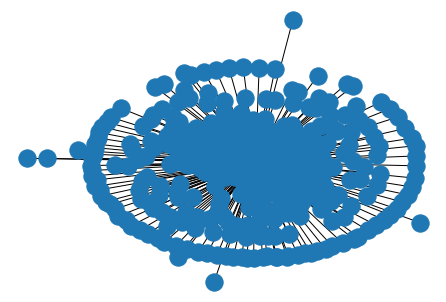

In [534]:
nx.draw(part_1_dict['15'])

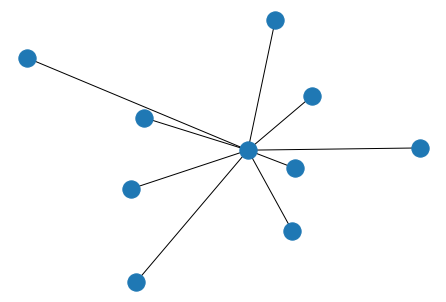

In [535]:
nx.draw(part_1_dict['20'])

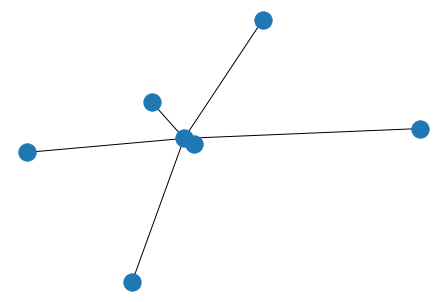

In [536]:
nx.draw(part_1_dict['49'])

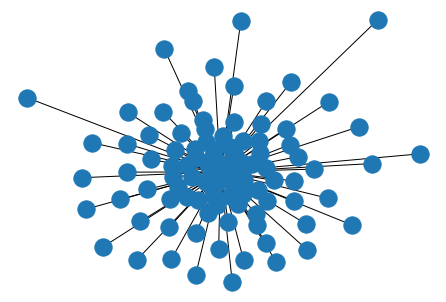

In [537]:
nx.draw(part_1_dict['13'])

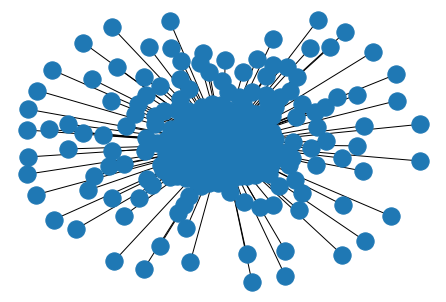

In [538]:
nx.draw(part_1_dict['25'])

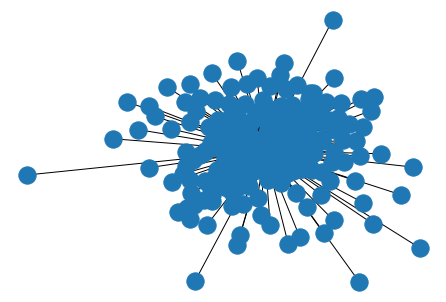

In [539]:
nx.draw(part_1_dict['32'])

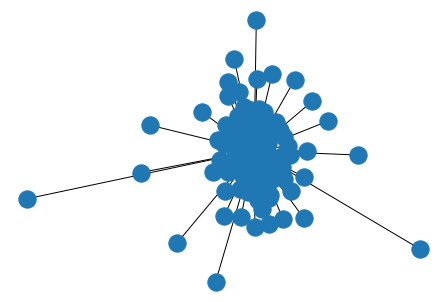

In [540]:
nx.draw(part_1_dict['37'])

**Graph Building Phase-2** 

In [541]:
target_list = list(df2['Target Name Assigned by Curator or DataSource'].unique())

In [542]:
df2.head()

,PubChem CID,index,Target Name Assigned by Curator or DataSource,min
2790,5327826,2835,"Protein Kinase C, alpha",3800.0
2791,5327827,2836,"Protein Kinase C, alpha",4700.0
2792,5327828,2837,"Protein Kinase C, alpha",19000.0
2793,5327829,2838,"Protein Kinase C, alpha",1000.5
2815,3501,2860,"Myosin light chain kinase, smooth muscle",5800.0


In [543]:
'''# convert to list
dd['component'] = dd['component'].str.split(',')

# convert list of pd.Series then stack it
dd = (dd
 .set_index(['issue_key','date','pkey','case_count'])['component']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_4', axis=1)
 .rename(columns={0:'component'}))

       issue_key        date   pkey  case_count      component
0       1060  2018-03-08   PROJ           8        console
1       1060  2018-03-08   PROJ           8  configuration
2       1060  2018-03-08   PROJ           8     management
3       1464  2018-04-24  PROJ2           1       protocol
4        611  2017-03-31   PROJ           2           None
5       2057  2018-10-30   PROJ           0             ha
6       2057  2018-10-30   PROJ           0        console'''

"# convert to list\ndd['component'] = dd['component'].str.split(',')\n\n# convert list of pd.Series then stack it\ndd = (dd\n .set_index(['issue_key','date','pkey','case_count'])['component']\n .apply(pd.Series)\n .stack()\n .reset_index()\n .drop('level_4', axis=1)\n .rename(columns={0:'component'}))\n\n       issue_key        date   pkey  case_count      component\n0       1060  2018-03-08   PROJ           8        console\n1       1060  2018-03-08   PROJ           8  configuration\n2       1060  2018-03-08   PROJ           8     management\n3       1464  2018-04-24  PROJ2           1       protocol\n4        611  2017-03-31   PROJ           2           None\n5       2057  2018-10-30   PROJ           0             ha\n6       2057  2018-10-30   PROJ           0        console"

Converting the Dataframe with multiple values to a single one

In [544]:
df2['Target Name Assigned by Curator or DataSource'] = df2['Target Name Assigned by Curator or DataSource'].str.split(',')

In [545]:
df2 = (df2.set_index(['PubChem CID','min'])['Target Name Assigned by Curator or DataSource']
       .apply(pd.Series)
       .stack()
       .reset_index()
       .rename(columns={0:'Target Name Assigned by Curator or DataSource'})
      
      )

In [546]:
df2

,PubChem CID,min,level_2,Target Name Assigned by Curator or DataSource
0,5327826,3800.0,0,Protein Kinase C
1,5327826,3800.0,1,alpha
2,5327827,4700.0,0,Protein Kinase C
3,5327827,4700.0,1,alpha
4,5327828,19000.0,0,Protein Kinase C
...,...,...,...,...
71493,57411366,10000.5,1,5-bisphosphate 3-kinase catalytic subunit alph...
71494,76332666,10000.0,0,Phosphatidylinositol 4
71495,76332666,10000.0,1,5-bisphosphate 3-kinase catalytic subunit gamm...
71496,57411254,8135.0,0,Phosphatidylinositol 4


In [547]:
target_list = list(df2['Target Name Assigned by Curator or DataSource'].unique())

In [555]:
len(target_list)

376

In [548]:
#PART 2 - Mixed Complex List
t1 = time.time()
ele = 1
part_2_dict = {}
for targ in target_list: 
    print(str(ele)+str(" : ") + str(targ))
    tmp = df2.loc[df2['Target Name Assigned by Curator or DataSource']==targ]
    tmp_ids = tmp['PubChem CID'].to_list()
    Central_Node = targ
    tmp_ids.append(Central_Node)
    B = nx.Graph()
    B.add_nodes_from(tmp_ids)
    tmp_ids.pop()
    for pid in tmp_ids:
        val = float(tmp.loc[tmp['PubChem CID']==pid]['min'])
        B.add_edge(Central_Node,pid,weight=val)
    part_2_dict['{}'.format(ele)] = B
    ele+=1
    '''if ele ==50:
        break'''
t2 = time.time()
print(str("Time taken for : ") +str(len(target_list))+" is "+str(t2-t1)+" Seconds")

1 : Protein Kinase C
2 :  alpha
3 : Myosin light chain kinase
4 :  smooth muscle
5 : Glycogen Synthase Kinase-3
6 :  beta
7 : Cytochrome P450 11B1
8 :  mitochondrial
9 : cGMP-dependent 3'
10 : 5'-cyclic phosphodiesterase
11 : cAMP-specific 3'
12 : 5'-cyclic phosphodiesterase 4A
13 : cGMP-specific 3'
14 : Dihydroorotate dehydrogenase (quinone)
15 : Calcium/calmodulin-dependent 3'
16 : 5'-cyclic nucleotide phosphodiesterase 1B
17 : Phosphatidylinositol 4
18 : 5-bisphosphate 3-kinase catalytic subunit gamma isoform
19 : c-Jun N-terminal kinase
20 :  JNK
21 : 17-beta-Hydroxysteroid Dehydrogenase 5 (17-beta-HSD5
22 :  AKR1C3)
23 : Nitric-oxide synthase
24 :  brain
25 : Indoleamine 2
26 : 3-dioxygenase 1
27 : Nitric Oxide Synthase
28 :  endothelial
29 : Estrogen-Related Receptor
30 : Glycogen phosphorylase
31 :  muscle form
32 : Malate Dehydrogenase
33 : Phospholipase A2
34 :  membrane associated
35 : 5-bisphosphate 3-kinase catalytic subunit alpha isoform
36 : Phosphoinositide 3-Kinase (PI3

286 : 6-bisphosphatase 1
287 : Sodium/potassium/calcium exchanger 6
288 : Solute carrier family 2
289 :  facilitated glucose transporter member 1
290 : 1
291 : 3-beta-glucan synthase component GLS2
292 :  facilitated glucose transporter member 2
293 :  facilitated glucose transporter member 3
294 :  LRR and PYD domains-containing protein 3
295 : 3-beta-glucan synthase
296 : 4-hydroxy-2-oxoglutarate aldolase
297 : Aldehyde dehydrogenase
298 :  cytosolic 1
299 : V-type proton ATPase subunit B
300 :  brain isoform
301 : Fumarate hydratase
302 : 3-dioxygenase 2
303 : ATP synthase subunit beta
304 : 6
305 : 7-dimethyl-8-ribityllumazine synthase
306 : 5-trisphosphate receptor type 1
307 : 6-phosphogluconate dehydrogenase
308 :  decarboxylating
309 : 4-galactosyltransferase 1
310 : CMP-N-acetylneuraminate-beta-1
311 : 4-galactoside alpha-2
312 : 3-dihydroxybenzoate-AMP ligase
313 : Translation factor GUF1
314 : Sterol 26-hydroxylase
315 : 3-glucan synthase
316 : 4-Dihydroxy-2-naphthoyl-CoA sy

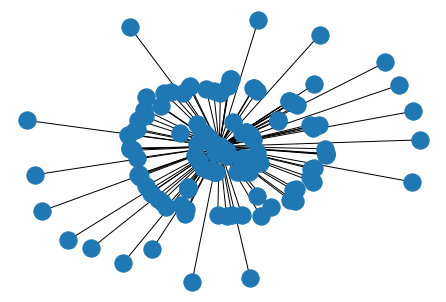

In [549]:
nx.draw(part_2_dict['15'])

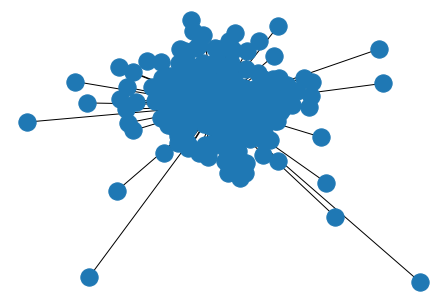

In [550]:
nx.draw(part_2_dict['25'])

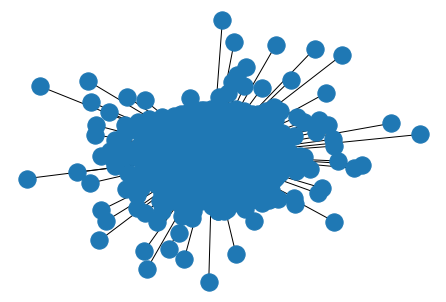

In [551]:
nx.draw(part_2_dict['35'])

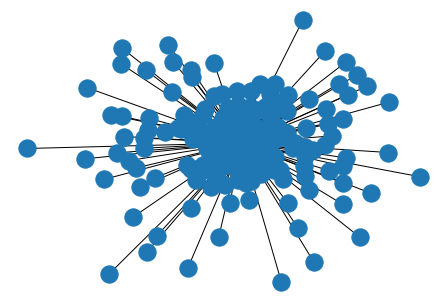

In [552]:
nx.draw(part_2_dict['45'])

In [553]:
winsound.Beep(frequency, duration)

# Temp Work - Network analysis


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

**Creation**

In [ ]:
g = nx.Graph()

In [ ]:
g.add_node('A')
g.add_node('B')
g.add_nodes_from(['C','D','E'])
g.add_edge('A','B')
g.add_edge('B','C')
g.add_edge('C','D')
g.add_edge('D','E')
g.add_edge('E','A')
g.add_edges_from([('D','A'),('C','A'),('D','B'),('C','E')])

In [ ]:
g.nodes(),g.edges(),nx.info(g)

**Plotting**

In [ ]:
nx.draw(g,with_labels=True)

In [ ]:
nx.draw_networkx(g)

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(g)
plt.show()

In [ ]:
nx.spring_layout(g)
nx.draw_networkx(g)

**Analysis**

In [ ]:
nx.degree(g,'A'),nx.degree(g,'C'),nx.degree(g,'E') #Nodes connected to

In [ ]:
nx.shortest_path(g,'A','E'), nx.shortest_path(g,'A','C') #shortest distance

In [ ]:
nx.degree_centrality(g)

In [ ]:
nx.eigenvector_centrality(g)

In [ ]:
nx.betweenness_centrality(g)

In [ ]:
nx.average_clustering(g)

**TARGET - WORK**

1. ) nodes  - target_name , cid 
interrelation - ki,kd,ic50 ( less > closer the nodes)

  2.) user gives a cid , we form a network of related compounds 
  
  We do it , by a) download the structure-similar compounds
  b) We'll compare with the network (closely linked checking - )